In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib import font_manager, rc
import sys

plt.style.use('fivethirtyeight')
plt.rc('font', family='Malgun Gothic') 

In [124]:
df = pd.read_excel('17_25성과_오전2.xlsx')
df.fillna(0, inplace=True)
df

,행 레이블,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554,총합계
0,2021-07-16,0.0000,0.0000,0.0000,0.0000,0.000000
1,2021-07-17,0.0083,0.0118,0.0067,0.0095,0.009075
2,2021-07-18,0.0032,0.0062,0.0052,0.0082,0.005700
3,2021-07-19,0.0096,0.0145,0.0126,0.0141,0.012700
4,2021-07-20,0.0070,0.0078,0.0119,0.0094,0.009025
5,2021-07-21,0.0051,0.0146,0.0126,0.0088,0.010275
6,2021-07-22,0.0062,0.0146,0.0345,0.0053,0.015150
7,2021-07-23,0.0054,0.0238,0.0277,0.0062,0.015775
8,2021-07-24,0.0067,0.0142,0.0197,0.0074,0.012000
9,2021-07-25,0.0189,0.0044,0.0184,0.0050,0.011675


MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


GIF_make_finish


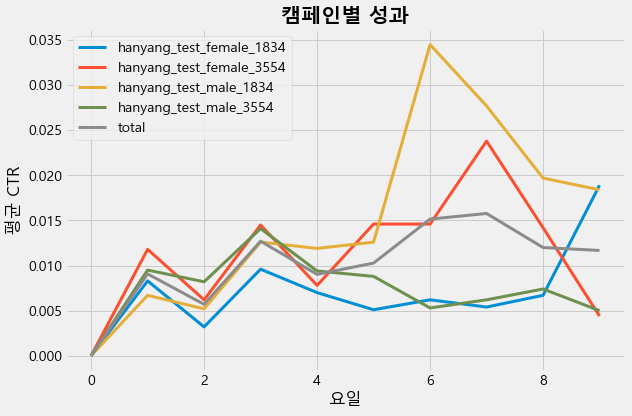

In [125]:
fig=plt.figure(figsize=(9,6))

def animate(i):
    x = np.linspace(0,i,i+1)
    y1 = df['hanyang_test_female_1834'][:i+1]
    y2 = df['hanyang_test_female_3554'][:i+1]
    y3 = df['hanyang_test_male_1834'][:i+1]
    y4 = df['hanyang_test_male_3554'][:i+1]
    y5 = df['총합계'][:i+1]
      
    plt.cla()
    plt.plot(x, y1, label='hanyang_test_female_1834', lw=3)
    plt.plot(x, y2, label='hanyang_test_female_3554', lw=3)
    plt.plot(x, y3, label='hanyang_test_male_1834', lw=3)
    plt.plot(x, y4, label='hanyang_test_male_3554', lw=3)
    plt.plot(x, y5, label='total', lw=3)
    plt.title('캠페인별 성과', fontweight='bold')
    plt.ylabel('평균 CTR')
    plt.xlabel('요일')
    plt.legend(loc='upper left')
    plt.tight_layout()
    
ani = FuncAnimation(plt.gcf(), animate, frames=10, interval=0000.1)
ani.save('./캠페인별 성과.gif', fps=0.5)
print('GIF_make_finish')

In [123]:
df2 = df[['hanyang_test_female_1834', 'hanyang_test_female_3554',
       'hanyang_test_male_1834', 'hanyang_test_male_3554']].apply(lambda x: x*1000).astype(int)
df2

,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554
0,0,0,0,0
1,8,11,6,9
2,3,6,5,8
3,9,14,12,14
4,7,7,11,9
5,5,14,12,8
6,6,14,34,5
7,5,23,27,6
8,6,14,19,7
9,18,4,18,5


In [74]:
date_df = pd.DataFrame(df['행 레이블'])
date_df

,행 레이블
0,2021-07-16
1,2021-07-17
2,2021-07-18
3,2021-07-19
4,2021-07-20
5,2021-07-21
6,2021-07-22
7,2021-07-23
8,2021-07-24
9,2021-07-25


In [91]:
df3.iloc[:, = pd.concat([date_df, df2], axis=1)
# df3['행 레이블'] = pd.to_datetime(df3['행 레이블'])
df3

,행 레이블,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554
0,2021-07-16,0,0,0,0
1,2021-07-17,8,11,6,9
2,2021-07-18,3,6,5,8
3,2021-07-19,9,14,12,14
4,2021-07-20,7,7,11,9
5,2021-07-21,5,14,12,8
6,2021-07-22,6,14,34,5
7,2021-07-23,5,23,27,6
8,2021-07-24,6,14,19,7
9,2021-07-25,18,4,17,0


In [89]:
df3 = df3.cumsum()
df3

,행 레이블,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554
0,2021-07-16 00:00:00.000000000,0,0,0,0
1,2073-01-29 00:00:00.000000000,8,11,6,9
2,2124-08-16 00:00:00.000000000,11,17,11,17
3,2176-03-03 00:00:00.000000000,20,31,23,31
4,2227-09-21 00:00:00.000000000,27,38,34,40
5,1694-09-19 00:25:26.290448384,32,52,46,48
6,1746-04-10 00:25:26.290448384,38,66,80,53
7,1797-10-30 00:25:26.290448384,43,89,107,59
8,1849-05-23 00:25:26.290448384,49,103,126,66
9,1900-12-15 00:25:26.290448384,67,107,143,66


In [110]:
campagin_df = pd.read_csv('캠페인_보고서.csv', encoding='euc-kr')
campagin_df.head()

,일,캠페인,노출수,평균 비용,평균 CPC,평균 CPM,클릭률(CTR)
0,2021-07-16,hanyang_test_male_3554,0,0,0,0,0.00%
1,2021-07-16,hanyang_test_female_3554,0,0,0,0,0.00%
2,2021-07-16,hanyang_test_female_1834,0,0,0,0,0.00%
3,2021-07-16,hanyang_test_male_1834,1,0,0,0,0.00%
4,2021-07-17,hanyang_test_male_3554,2213,250,250,2376,0.95%


In [111]:
im_df = campagin_df[['일', '캠페인', '노출수']]
im_df.head()

,일,캠페인,노출수
0,2021-07-16,hanyang_test_male_3554,0
1,2021-07-16,hanyang_test_female_3554,0
2,2021-07-16,hanyang_test_female_1834,0
3,2021-07-16,hanyang_test_male_1834,1
4,2021-07-17,hanyang_test_male_3554,2213


In [112]:
piv_im_df = im_df.pivot_table(values = '노출수', index = ['일'], columns = '캠페인')
piv_im_df

캠페인,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554
일,,,,
2021-07-16,0,0,1,0
2021-07-17,2762,2112,3148,2213
2021-07-18,3702,1298,2479,975
2021-07-19,1456,622,238,71
2021-07-20,1869,2313,923,1381
2021-07-21,1188,480,793,684
2021-07-22,2081,412,521,1129
2021-07-23,742,168,325,1286
2021-07-24,2407,422,356,821


In [113]:
piv_im_df.iloc[:, 0:-1] = piv_im_df.iloc[:, 0:-1].cumsum()
piv_im_df

캠페인,hanyang_test_female_1834,hanyang_test_female_3554,hanyang_test_male_1834,hanyang_test_male_3554
일,,,,
2021-07-16,0,0,1,0
2021-07-17,2762,2112,3149,2213
2021-07-18,6464,3410,5628,975
2021-07-19,7920,4032,5866,71
2021-07-20,9789,6345,6789,1381
2021-07-21,10977,6825,7582,684
2021-07-22,13058,7237,8103,1129
2021-07-23,13800,7405,8428,1286
2021-07-24,16207,7827,8784,821


In [120]:
import bar_chart_race as bcr

bcr.bar_chart_race(df = piv_im_df, 
                   n_bars = 4, 
                   sort='desc',
                   title='캠페인 성과',
                   filename = 'test.mp4')

C:\Users\Admin\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Admin\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
MovieWriter ffmpeg unavailable; using Pillow instead.


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            list index out of range
                            